<h1><b>Battle of IT SEZ's in and around Chennai</b> </h1>

<h3> First we will web scrap the data from the given wikipedia page </h3>

<h4> Before that as usual , we will import the libraries before starting the code </h4>

In [2]:
#install BeautifulSoup library for the purpose of web scraping
! pip install beautifulsoup4

     |████████████████████████████████| 112kB 25.5MB/s eta 0:00:01


In [3]:
#install lxml and html5lib parser library
!pip install lxml
!pip install html5lib

     |████████████████████████████████| 5.8MB 7.0MB/s eta 0:00:01


In [4]:
# installing request library for getting request from web page
!pip install request

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d6/a4/78/01b20a9dc224dcc009fab669f7f27b943b8889c5150bd68d8a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/23/7c/6e/f5b4e09d6596c8b8802b347e48f149031e2363368048f1347a
Successfully built request get post query-string public


In [5]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline

In [6]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    lib

In [7]:
#importing Beautiful soup library
from bs4 import BeautifulSoup

In [8]:
#importing request
import requests

In [9]:
#assign wikipage url to a variable
wiki_url="https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai"

In [10]:
#Get the response from the wikipedia page url and assign it to a variable
source= requests.get(wiki_url).text

In [12]:
#create one beautiful soup object with the above source page with lxml parser
soup=BeautifulSoup(source,'lxml')

In [13]:
#print(soup)
#commenting above line since there will be no indentation in html page
#To make it indented as original html file
s=soup.prettify()

In [14]:
#Copying the html file in a text file for future use
with open("Chennai_IT_parks.txt","w") as File1:
    for line in s:
        File1.write(line)

In [15]:
#Since everything comes under body tag except heading , we are storing that tag in a variable
full_page=soup.find('body')

In [16]:
#finding the table tag from the web page using inspect tag and storing the xml codes within table tags in a variable
post_table=full_page.find('table',class_='wikitable sortable')

In [20]:
#print(post_table)

In [16]:
#Just a rough traversal of the soub object within the xml tags
post_table.tbody.th.text

'Company name\n'

In [17]:
#converting html file with intetantation to raw string html file for the purpose of passing it to read_html function as argument
table1=str(post_table)

In [18]:
#reading from html file to dataframe
df=pd.read_html(table1)

In [19]:
#we are getting the list containing the needed dataframe
df

[                   Company name Lakh sqft                        Address  \
 0                    Tidel Park        15                       Taramani   
 1             Olympia Tech Park        13                         Guindy   
 2                 SRM Tech Park        34                        Potheri   
 3       Bahwan CyberTek IT Park       1.8                   Thoraipakkam   
 4            IITM Research Park       8.2                       Taramani   
 ..                          ...       ...                            ...   
 107  Yekediar farms - (unnamed)       2.1             Okkiam Torappakkam   
 108     Matrix towers - (SSPDL)       2.5                      Perungudi   
 109   Succons OKI Infotech Park      1.20                       Navallur   
 110         One IndiaBulls Park        24     Ambattur Industrial Estate   
 111                  TECCI Park         6  OMR,Karapakkam,Chennai-600083   
 
     Investment Start datecurrent status  \
 0          NaN               

In [20]:
#our dataframe is in the 1st index of the list
df[0]

,Company name,Lakh sqft,Address,Investment,Start datecurrent status,Notable clients
0,Tidel Park,15,Taramani,NaN,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,Olympia Tech Park,13,Guindy,240,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
2,SRM Tech Park,34,Potheri,NaN,2008,SRM Institute of Science and Technology
3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,NaN,2006,"Zafin Labs, Beroe Consulting India, Identive T..."
4,IITM Research Park,8.2,Taramani,NaN,2008,"Chakra Network Solutions, Saint-Gobain, Centre..."
...,...,...,...,...,...,...
107,Yekediar farms - (unnamed),2.1,Okkiam Torappakkam,NaN,UC,NaN
108,Matrix towers - (SSPDL),2.5,Perungudi,NaN,Completed,NaN
109,Succons OKI Infotech Park,1.20,Navallur,NaN,NaN,NaN
110,One IndiaBulls Park,24,Ambattur Industrial Estate,NaN,Completed,"Royal Bank of Scotland, Vodafone Essar, Telebu..."


In [21]:
#Assigning the dataframe to a meaningful variable
chennai_df=df[0]

In [22]:
#viewing the top 5 rows of the dataframe
chennai_df.head()

,Company name,Lakh sqft,Address,Investment,Start datecurrent status,Notable clients
0,Tidel Park,15,Taramani,NaN,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,Olympia Tech Park,13,Guindy,240,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
2,SRM Tech Park,34,Potheri,NaN,2008,SRM Institute of Science and Technology
3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,NaN,2006,"Zafin Labs, Beroe Consulting India, Identive T..."
4,IITM Research Park,8.2,Taramani,NaN,2008,"Chakra Network Solutions, Saint-Gobain, Centre..."


In [22]:
#viewing the columns of the dataframe
chennai_df.columns

Index(['Company name', 'Lakh sqft', 'Address', 'Investment',
       'Start datecurrent status', 'Notable clients'],
      dtype='object')

In [23]:
#Dropping investment column as it is not needed for us in our present scenario
chennai_df.drop(['Investment'],axis=1,inplace=True)

In [24]:
#viewing the top 5 rows of the dataframe after dropping investment column
chennai_df.head()

,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients
0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology
3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T..."
4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre..."


In [25]:
#Viewing the columns which has completed value in Start datecurrent status column
chennai_df[['Start datecurrent status']]

,Start datecurrent status
0,2000
1,2006
2,2008
3,2006
4,2008
...,...
107,UC
108,Completed
109,NaN
110,Completed


In [26]:
#replacing all the Underconstruction and Planning values in start datecurrent status column with null values
chennai_df['Start datecurrent status'].replace(['UC','PLANNING','Planning'],np.nan,inplace=True)

In [27]:
#viewing the top 15 rows of the dataframe
chennai_df.head(15)

,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients
0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology
3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T..."
4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre..."
5,Ceedeeyes Tech Park,1.48,Thoraipakkam,2006,TCS
6,ETL Infrastructure - Chennai One,12,Thoraippakkam,2006,"Comcast India, TCS, SIEMENS (ATOS), Wipro, Vem..."
7,TEK Meadows,6.35,"Sholinganallur,Taramani",2006,"Aviva, EDS, Ford,Flextronics"
8,Quanta Engineers,0.89,Teynampet,2006,Kanbay (Cap Gemini)
9,Ascendas Stage III,7.42,Taramani,2010,OFS


In [28]:
#Dropping the row which has null values in Start datecurrent status  column
chennai_df.dropna(subset=['Start datecurrent status'],axis=0,inplace=True)

In [31]:
print("The size of the dataframe after dropping Under construction and planning values from Current status  of the dataframe are {}".format(chennai_df.shape))

The size of the dataframe after dropping Under construction and planning values from Current status  of the dataframe are (51, 5)


<b>Resetting the row index since we have dropped certain rows in previous step</b>

In [29]:
chennai_df.reset_index(inplace=True)

In [31]:
chennai_df.head()

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients
0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology
3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T..."
4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre..."


## We need to get the latitudes and longitudes of all the IT parks

In [30]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 921kB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 27.8MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 9.2MB/s eta 0:00:01    |█████████████████████▎          | 7.9MB 9.2MB/s eta 0:00:01     |████████████████████████▉       | 9.2MB 9.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 20.0MB/s eta 0:00:01


#### Adding Tamil Nadu, India to get the latitude and longitude of each places and store it in a separate column

In [31]:
chennai_df['Full Address']= chennai_df['Address']+' , Tamil Nadu, India'

In [32]:
chennai_df.head()

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address
0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble","Taramani , Tamil Nadu, India"
1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India"
2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India"
3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India"
4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre...","Taramani , Tamil Nadu, India"


#### Defining a user agent name for Nominatiom parameter

In [33]:
geolocator = Nominatim(user_agent="chn_explorer")

####  Getting the latitude and longitude of each location

In [34]:
from geopy.extra.rate_limiter import RateLimiter
try:
    
# 1 - conveneint function to delay between geocoding calls
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
    chennai_df['location'] = chennai_df['Full Address'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
    chennai_df['point'] = chennai_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
    chennai_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(chennai_df['point'].tolist(), index=chennai_df.index)
except:
    pass

In [36]:
#Viewing the new dataframe
chennai_df.head()

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address,location,point,latitude,longitude,altitude
0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...","(12.9849067, 80.2404069, 0.0)",12.984907,80.240407,0.0
1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...","(13.0087095, 80.2203646, 0.0)",13.008710,80.220365,0.0
2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India","(Potheri, Grand Southern Trunk Road, Mahindra ...","(12.8207567, 80.0368745, 0.0)",12.820757,80.036874,0.0
3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...","(12.9300691, 80.2300221, 0.0)",12.930069,80.230022,0.0
4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre...","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...","(12.9849067, 80.2404069, 0.0)",12.984907,80.240407,0.0


In [37]:
#Dropping the currently unwanted point and altitude column
chennai_df.drop(['point','altitude'],axis=1,inplace=True)

In [38]:
#Viewing the new dataframe's location for null values
chennai_df['location'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19     True
20    False
21     True
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34     True
35    False
36    False
37     True
38     True
39     True
40     True
41    False
42    False
43     True
44    False
45     True
46    False
47    False
48    False
49    False
50     True
Name: location, dtype: bool

#### As you can see above location column has few null values, so we are going to drop it for calculation purpose

In [39]:
chennai_df.dropna(subset=['location'],axis=0,inplace=True)

Resetting the row index since we have dropped certain rows

In [40]:
chennai_df.reset_index(inplace=True)

In [42]:
chennai_df.head()

,level_0,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address,location,latitude,longitude
0,0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407
1,1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...",13.008710,80.220365
2,2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India","(Potheri, Grand Southern Trunk Road, Mahindra ...",12.820757,80.036874
3,3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...",12.930069,80.230022
4,4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre...","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407


In [41]:
#dropping the level_0 column
chennai_df.drop(['level_0'],axis=1,inplace=True)

In [42]:
chennai_df.head()

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address,location,latitude,longitude
0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407
1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...",13.008710,80.220365
2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India","(Potheri, Grand Southern Trunk Road, Mahindra ...",12.820757,80.036874
3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...",12.930069,80.230022
4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre...","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407


<b>Now we get the latitude and longitude of Chennai City</b>

In [43]:
address = 'Chennai, Tamil Nadu, India'
location = geolocator.geocode(address)
chn_latitude = location.latitude
chn_longitude = location.longitude
print('The geograpical coordinates of Chennai City are {}, {}.'.format(chn_latitude, chn_longitude))

The geograpical coordinates of Chennai City are 13.0801721, 80.2838331.


#### Create a map of Chennai with neighborhoods superimposed on top.

In [44]:
# create map of Toronto using latitude and longitude values
map_chennai = folium.Map(location=[chn_latitude,chn_longitude], zoom_start=10)
map_chennai

In [46]:
#add markers to map
#for parallel iteration of passing multiple values in each row from the columns we need, we use zip function
for lat, lng, compname,compaddress in zip(chennai_df['latitude'], chennai_df['longitude'], chennai_df['Company name'], chennai_df['Address']):
    label = '{},{}'.format(compname, compaddress) #Defining what must be shown in marker points
    label = folium.Popup(label, parse_html=True)#Passing the label to popup method  to popup the label while we click on marker points
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)

In [47]:
### Viewing the new chennai map with markers
map_chennai

#### Define Foursquare Credentials and Version

In [53]:
CLIENT_ID = 'CCMYIITNBZW3OOFPKLXF35GFAL4IQ1TUIETZXUQPS1WF3JYO' # your Foursquare ID
CLIENT_SECRET = 'NP2ZTUVPUO3TY0CSF3OMEVQJNPQWMKXHWBFNWM0AHCNPVMJU' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CCMYIITNBZW3OOFPKLXF35GFAL4IQ1TUIETZXUQPS1WF3JYO
CLIENT_SECRET:NP2ZTUVPUO3TY0CSF3OMEVQJNPQWMKXHWBFNWM0AHCNPVMJU


##  Explore Neighborhoods nearby all the IT SEZ's in our dataframe

## let us create a function to get the nearby venues and its coordinates i.e its latitudes and longitudes

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
#Defining limit
limit=15

### Getting the nearby venues of the Chennai IT tech parks

In [56]:
chennai_ITpark_nearby_venues = getNearbyVenues(names=chennai_df['Company name'],
                                   latitudes=chennai_df['latitude'],
                                   longitudes=chennai_df['longitude']
                                  )

Tidel Park
Olympia Tech Park
SRM Tech Park
Bahwan CyberTek IT Park
IITM Research Park
Ceedeeyes Tech Park
TEK Meadows
Quanta Engineers
Ascendas Stage III
Ascendas stage I
Bascon IT park
Prince Infocity
Prince Info City II
Arihant Technopolis
Pioneer Asia - Tamarai Tech Park
Ramaniyam - Baid Hi-Tech Park
Rayala corporation - Rayala Technopark
Vishranthi homes - stargate
Citilights freedom/pacifica
Ascendas stage II
RMZ Millenia - Phase II
MPL SILICON TOWERS
Prince Info Park (IT)
Shapoorji Pallonji Infocity(SP Infocity)
Prestige Polygon IT park
RR Towers Industries phase 4
TVH - Agnitio
Ramaniyam - Bristol
Alpha city -SSPDL
Ramaniyam Greeta
Rattha Tek Towers
Ambattur Clothing Co (The Ambit)
Matrix towers - (SSPDL)
One IndiaBulls Park


### Viewing the new dataframe 

In [57]:

chennai_ITpark_nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Olympia Tech Park,13.008710,80.220365,ITC Grand Chola,13.010440,80.220669,Hotel
1,Olympia Tech Park,13.008710,80.220365,Peshawri,13.010536,80.220252,Indian Restaurant
2,Olympia Tech Park,13.008710,80.220365,"Ottimo Cucina Italiana, ITC Grand Chola",13.010444,80.220938,Italian Restaurant
3,Olympia Tech Park,13.008710,80.220365,Pan Asian,13.010991,80.220408,Asian Restaurant
4,Olympia Tech Park,13.008710,80.220365,Madras Pavilion,13.011117,80.220419,Indian Restaurant
...,...,...,...,...,...,...,...
175,Matrix towers - (SSPDL),12.971024,80.241805,Superstar Pizza,12.973534,80.244245,Pizza Place
176,One IndiaBulls Park,13.092285,80.167549,Subway,13.094722,80.169145,Fast Food Restaurant
177,One IndiaBulls Park,13.092285,80.167549,Akshya Food Court,13.094574,80.169247,Food Court
178,One IndiaBulls Park,13.092285,80.167549,Kfc Ambit,13.088974,80.167662,Fried Chicken Joint


In [53]:
#Viewing the shape of the new dataframe
chennai_ITpark_nearby_venues.shape

(202, 7)

In [54]:
#Viewing the shape of our earlier chennai dataframe
chennai_df.shape


(34, 10)

In [58]:
#Let's check how many venues were returned for each neighborhood
chennai_ITpark_nearby_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ambattur Clothing Co (The Ambit),3,3,3,3,3,3
Arihant Technopolis,5,5,5,5,5,5
Bahwan CyberTek IT Park,15,15,15,15,15,15
Bascon IT park,5,5,5,5,5,5
Ceedeeyes Tech Park,15,15,15,15,15,15
MPL SILICON TOWERS,1,1,1,1,1,1
Matrix towers - (SSPDL),5,5,5,5,5,5
Olympia Tech Park,15,15,15,15,15,15
One IndiaBulls Park,4,4,4,4,4,4


#### Let's find out how many unique categories can be curated from all the returned venues

In [59]:
print('There are {} uniques categories.'.format(len(chennai_ITpark_nearby_venues['Venue Category'].unique())))

There are 44 uniques categories.


## Analyze Each Neighborhood

#### Applying one hot encoding technique for the venue categories to convert Venue Categories variable to Numerical Variable

In [60]:
# one hot encoding
chennai_onehot = pd.get_dummies(chennai_ITpark_nearby_venues[['Venue Category']], prefix="", prefix_sep="")



In [61]:
chennai_onehot.head()

,Arcade,Asian Restaurant,Athletics & Sports,Auto Workshop,Bowling Alley,Burger Joint,Bus Station,Business Service,Café,Chettinad Restaurant,...,Platform,Playground,Restaurant,River,Sandwich Place,Shoe Store,South Indian Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# add neighborhood column back to dataframe
chennai_onehot['Neighborhood'] =chennai_ITpark_nearby_venues['Neighborhood']

In [71]:
chennai_onehot.head()

,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bowling Alley,Burger Joint,Cafeteria,Café,Chinese Restaurant,Clothing Store,...,Platform,Playground,Restaurant,River,Sandwich Place,South Indian Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Neighborhood
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Tidel Park
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Olympia Tech Park
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Olympia Tech Park
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Olympia Tech Park
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Olympia Tech Park


In [63]:
# move neighborhood column to the first column
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot.head()

,Neighborhood,Arcade,Asian Restaurant,Athletics & Sports,Auto Workshop,Bowling Alley,Burger Joint,Bus Station,Business Service,Café,...,Platform,Playground,Restaurant,River,Sandwich Place,Shoe Store,South Indian Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar
0,Olympia Tech Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Olympia Tech Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Olympia Tech Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Olympia Tech Park,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Olympia Tech Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
chennai_onehot.shape

(202, 44)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [64]:
chennai_grouped = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_grouped.head()

,Neighborhood,Arcade,Asian Restaurant,Athletics & Sports,Auto Workshop,Bowling Alley,Burger Joint,Bus Station,Business Service,Café,...,Platform,Playground,Restaurant,River,Sandwich Place,Shoe Store,South Indian Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar
0,Ambattur Clothing Co (The Ambit),0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0
1,Arihant Technopolis,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Bahwan CyberTek IT Park,0.0,0.066667,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,...,0.0,0.0,0.066667,0.000000,0.0,0.0,0.066667,0.0,0.0,0.0
3,Bascon IT park,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.2,0.000000,0.000000,0.0,0.2,0.000000,0.0,0.0,0.0
4,Ceedeeyes Tech Park,0.0,0.066667,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,...,0.0,0.0,0.066667,0.000000,0.0,0.0,0.066667,0.0,0.0,0.0


#### Let's confirm the new size after grouping by neighborhood

In [73]:
chennai_grouped.shape

(30, 44)

#### Let's print each neighborhood along with the top 5 most common venues

In [65]:
num_top_venues = 5

for hood in chennai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chennai_grouped[chennai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambattur Clothing Co (The Ambit)----
           venue  freq
0          River  0.33
1  Movie Theater  0.33
2      Multiplex  0.33
3         Arcade  0.00
4         Office  0.00


----Arihant Technopolis----
                     venue  freq
0              Pizza Place   0.4
1     Fast Food Restaurant   0.2
2               Food Court   0.2
3        Indian Restaurant   0.2
4  South Indian Restaurant   0.0


----Bahwan CyberTek IT Park----
               venue  freq
0  Indian Restaurant  0.27
1        Pizza Place  0.13
2               Café  0.07
3   Asian Restaurant  0.07
4     Ice Cream Shop  0.07


----Bascon IT park----
                  venue  freq
0     Indian Restaurant   0.4
1            Shoe Store   0.2
2  Fast Food Restaurant   0.2
3            Playground   0.2
4                Office   0.0


----Ceedeeyes Tech Park----
               venue  freq
0  Indian Restaurant  0.27
1        Pizza Place  0.13
2               Café  0.07
3   Asian Restaurant  0.07
4     Ice Cream Shop  0.07


First, let's write a function to sort the venues in descending order.

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_grouped['Neighborhood']

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambattur Clothing Co (The Ambit),River,Movie Theater,Multiplex,Whisky Bar,Chinese Restaurant,Food Court,Fast Food Restaurant,Farmers Market,Department Store,Cosmetics Shop
1,Arihant Technopolis,Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop
2,Bahwan CyberTek IT Park,Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant
3,Bascon IT park,Indian Restaurant,Shoe Store,Fast Food Restaurant,Playground,Whisky Bar,Chinese Restaurant,Food Court,Farmers Market,Department Store,Cosmetics Shop
4,Ceedeeyes Tech Park,Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant


### Now we will try to Cluster Neighborhoods

In [68]:
#Now we will drop categorical variable Neigborhood since it shd not be there for Clustering
chennai_grouped_clustering = chennai_grouped.drop('Neighborhood', 1)

In [69]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
   # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(chennai_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

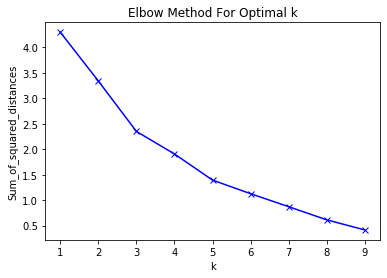

In [70]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Seeing the Above Elbow Diagram we chose optimal value K as 5

In [71]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 1, 1, 1, 2, 0, 1, 4, 3], dtype=int32)

### Predicting for the values with fitted cluster

In [72]:
predict=kmeans.predict(chennai_grouped_clustering)

In [73]:
predict_df=pd.DataFrame(predict)

In [74]:
predict_df.columns.name

In [75]:
neighborhoods_venues_sorted.shape

(24, 11)

#### Adding the cluster labels to the dataframe

In [78]:
neighborhoods_venues_sorted['cluster_labels'] = predict_df[0]

In [79]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
0,Ambattur Clothing Co (The Ambit),River,Movie Theater,Multiplex,Whisky Bar,Chinese Restaurant,Food Court,Fast Food Restaurant,Farmers Market,Department Store,Cosmetics Shop,3
1,Arihant Technopolis,Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0
2,Bahwan CyberTek IT Park,Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1
3,Bascon IT park,Indian Restaurant,Shoe Store,Fast Food Restaurant,Playground,Whisky Bar,Chinese Restaurant,Food Court,Farmers Market,Department Store,Cosmetics Shop,1
4,Ceedeeyes Tech Park,Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1


## Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [80]:

#create a copy of the original dataframe
chennai_merged = chennai_df

In [93]:
chennai_merged.head()

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address,location,latitude,longitude
0,0,Tidel Park,15,Taramani,2000,"Cisco Systems, Sify, Tenneco, Trimble","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407
1,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...",13.008710,80.220365
2,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India","(Potheri, Grand Southern Trunk Road, Mahindra ...",12.820757,80.036874
3,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...",12.930069,80.230022
4,4,IITM Research Park,8.2,Taramani,2008,"Chakra Network Solutions, Saint-Gobain, Centre...","Taramani , Tamil Nadu, India","(Taramani, Zone 13 Adyar, Chennai, Chennai dis...",12.984907,80.240407


In [94]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambattur Clothing Co (The Ambit),Multiplex,River,Department Store,Movie Theater,Whisky Bar,Gym / Fitness Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Farmers Market
1,Arihant Technopolis,Indian Restaurant,Department Store,Food Court,Fast Food Restaurant,Café,Pizza Place,Whisky Bar,Hotel,Gym / Fitness Center,Fried Chicken Joint
2,Ascendas Stage III,Cafeteria,Whisky Bar,Coffee Shop,Hotel,Gym / Fitness Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Farmers Market,Electronics Store
3,Ascendas stage I,Cafeteria,Whisky Bar,Coffee Shop,Hotel,Gym / Fitness Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Farmers Market,Electronics Store
4,Ascendas stage II,Cafeteria,Whisky Bar,Coffee Shop,Hotel,Gym / Fitness Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Farmers Market,Electronics Store


In [81]:
#Merging both the dataframe
chennai_merged=pd.merge(chennai_merged, neighborhoods_venues_sorted.set_index('Neighborhood'), 
                        left_on='Company name',right_on='Neighborhood')
chennai_merged.head() ##see the last columns for cluster labels

,index,Company name,Lakh sqft,Address,Start datecurrent status,Notable clients,Full Address,location,latitude,longitude,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
0,1,Olympia Tech Park,13,Guindy,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","Guindy , Tamil Nadu, India","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...",13.008710,80.220365,...,Indian Restaurant,Restaurant,Whisky Bar,Molecular Gastronomy Restaurant,Asian Restaurant,Athletics & Sports,Vegetarian / Vegan Restaurant,Italian Restaurant,Café,1
1,2,SRM Tech Park,34,Potheri,2008,SRM Institute of Science and Technology,"Potheri , Tamil Nadu, India","(Potheri, Grand Southern Trunk Road, Mahindra ...",12.820757,80.036874,...,Market,Train Station,Juice Bar,Whisky Bar,Clothing Store,Food Court,Fast Food Restaurant,Farmers Market,Department Store,1
2,3,Bahwan CyberTek IT Park,1.8,Thoraipakkam,2006,"Zafin Labs, Beroe Consulting India, Identive T...","Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...",12.930069,80.230022,...,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1
3,5,Ceedeeyes Tech Park,1.48,Thoraipakkam,2006,TCS,"Thoraipakkam , Tamil Nadu, India","(Holiday Inn Express Chennai OMR Thoraipakkam,...",12.930069,80.230022,...,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1
4,7,TEK Meadows,6.35,"Sholinganallur,Taramani",2006,"Aviva, EDS, Ford,Flextronics","Sholinganallur,Taramani , Tamil Nadu, India","(AthenaHealth India, Block B 13th Floor, Dr MG...",12.969713,80.243957,...,Pizza Place,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0


In [82]:
#Renaming index column to more relevant name
chennai_merged.rename(columns={'index':'company_id'},inplace=True)

### Finally, let's visualize the resulting clusters

In [83]:
# create map
map_clusters = folium.Map(location=[chn_latitude, chn_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cname, cluster in zip(chennai_merged['latitude'], chennai_merged['longitude'], chennai_merged['Company name'], chennai_merged['cluster_labels']):
    label = folium.Popup(str(cname) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
                                                                                               

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

#### Cluster 1

In [84]:
cluster1_df=chennai_merged.loc[chennai_merged['cluster_labels'] == 0, 
                               chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

In [85]:
##Removing the unnecessary columns for viewing purposes
cluster1_df.drop(['Full Address','latitude','longitude'],axis=1,inplace=True)

#### Cluster 2

In [87]:
cluster2_df=chennai_merged.loc[chennai_merged['cluster_labels'] == 1, 
                               chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

In [88]:
##Removing the unnecessary columns for viewing purposes
cluster2_df.drop(['Full Address','latitude','longitude'],axis=1,inplace=True)

#### Cluster 3

In [89]:
cluster3_df=chennai_merged.loc[chennai_merged['cluster_labels'] == 2, 
                               chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

In [90]:
##Removing the unnecessary columns for viewing purposes
cluster3_df.drop(['Full Address','latitude','longitude'],axis=1,inplace=True)

#### Cluster 4

In [91]:
cluster4_df=chennai_merged.loc[chennai_merged['cluster_labels'] == 3, 
                               chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

In [92]:
##Removing the unnecessary columns for viewing purposes
cluster4_df.drop(['Full Address','latitude','longitude'],axis=1,inplace=True)

#### Cluster 5

In [95]:
cluster5_df=chennai_merged.loc[chennai_merged['cluster_labels'] == 4, 
                               chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

In [96]:
##Removing the unnecessary columns for viewing purposes
cluster5_df.drop(['Full Address','latitude','longitude'],axis=1,inplace=True)

## Interference from the Clusters

In [86]:
cluster1_df.head()

,Company name,Notable clients,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
4,TEK Meadows,"Aviva, EDS, Ford,Flextronics","(AthenaHealth India, Block B 13th Floor, Dr MG...",Indian Restaurant,Pizza Place,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0
9,Arihant Technopolis,HCL,"(Perungudi, Zone 14 Perungudi, Chennai, Sholin...",Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0
13,Vishranthi homes - stargate,Cognizant,"(Perungudi, Zone 14 Perungudi, Chennai, Sholin...",Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0
18,TVH - Agnitio,NaN,"(Perungudi, Zone 14 Perungudi, Chennai, Sholin...",Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0
20,Ramaniyam Greeta,NaN,"(Perungudi, Zone 14 Perungudi, Chennai, Sholin...",Pizza Place,Indian Restaurant,Food Court,Fast Food Restaurant,Whisky Bar,Chinese Restaurant,Fried Chicken Joint,Farmers Market,Department Store,Cosmetics Shop,0


#### Since the 1st Most Common Venue is Pizza Place, cluster1 can be called as <i>"PIZZA CLUSTER"</i>

In [93]:
cluster2_df.head()

,Company name,Notable clients,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
0,Olympia Tech Park,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...","(Guindy, Zone 13 Adyar, Chennai, Chennai distr...",Hotel,Indian Restaurant,Restaurant,Whisky Bar,Molecular Gastronomy Restaurant,Asian Restaurant,Athletics & Sports,Vegetarian / Vegan Restaurant,Italian Restaurant,Café,1
1,SRM Tech Park,SRM Institute of Science and Technology,"(Potheri, Grand Southern Trunk Road, Mahindra ...",Indian Restaurant,Market,Train Station,Juice Bar,Whisky Bar,Clothing Store,Food Court,Fast Food Restaurant,Farmers Market,Department Store,1
2,Bahwan CyberTek IT Park,"Zafin Labs, Beroe Consulting India, Identive T...","(Holiday Inn Express Chennai OMR Thoraipakkam,...",Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1
3,Ceedeeyes Tech Park,TCS,"(Holiday Inn Express Chennai OMR Thoraipakkam,...",Indian Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Department Store,Chinese Restaurant,Chettinad Restaurant,Café,Restaurant,South Indian Restaurant,1
5,Quanta Engineers,Kanbay (Cap Gemini),"(Teynampet, Zone 9 Teynampet, Chennai, Chennai...",Lounge,Hotel,Café,Indian Restaurant,Italian Restaurant,Coffee Shop,Chinese Restaurant,Nightclub,Bowling Alley,Business Service,1


#### Since the 1st Most Common Venue is Cafeteria, cluster2 can be called as <i>"INDIAN RESTAURANT CLUSTER"</i>

In [94]:
cluster3_df.head()

,Company name,Notable clients,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
14,MPL SILICON TOWERS,"Barry Wehmiller, Prizm, Scintel","(Pallikaranai, Zone 14 Perungudi, Chennai, Sho...",Farmers Market,Whisky Bar,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Department Store,Cosmetics Shop,Coffee Shop,2


#### Since the 1st Most Common Venue is Indian Restaurant, cluster3 can be called as <i>"MARKET CLUSTER"</i>

In [97]:
cluster4_df.head()

,Company name,Notable clients,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
10,Pioneer Asia - Tamarai Tech Park,"Dow Chemicals, Ericsson India Global Services,...","(North Phase, Guindy Ind. Est., Inner Ring Roa...",Asian Restaurant,Auto Workshop,Business Service,Middle Eastern Restaurant,Movie Theater,Whisky Bar,Coffee Shop,Fried Chicken Joint,Food Court,Fast Food Restaurant,3
17,RR Towers Industries phase 4,NaN,"(North Phase, Guindy Ind. Est., Inner Ring Roa...",Asian Restaurant,Auto Workshop,Business Service,Middle Eastern Restaurant,Movie Theater,Whisky Bar,Coffee Shop,Fried Chicken Joint,Food Court,Fast Food Restaurant,3
21,Ambattur Clothing Co (The Ambit),"CSS, iOpEx","(Ambattur, Thiruvallur district, Tamil Nadu, I...",River,Movie Theater,Multiplex,Whisky Bar,Chinese Restaurant,Food Court,Fast Food Restaurant,Farmers Market,Department Store,Cosmetics Shop,3


#### Since the 1st Most Common Venue is lake, cluster4 can be called as <i>"ASIAN RESTAURANT CLUSTER"</i>

In [98]:
cluster5_df.head()

,Company name,Notable clients,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,cluster_labels
15,Prince Info Park (IT),"Poletus Bics Global,Optimus,Slash Support,Data...","(Ambattur Industrial Estate, Zone 7 Ambattur, ...",Fried Chicken Joint,Food Court,Fast Food Restaurant,Café,Whisky Bar,Clothing Store,Gym / Fitness Center,Farmers Market,Department Store,Cosmetics Shop,4
23,One IndiaBulls Park,"Royal Bank of Scotland, Vodafone Essar, Telebu...","(Ambattur Industrial Estate, Zone 7 Ambattur, ...",Fried Chicken Joint,Food Court,Fast Food Restaurant,Café,Whisky Bar,Clothing Store,Gym / Fitness Center,Farmers Market,Department Store,Cosmetics Shop,4


#### Since the 1st Most Common Venue is lake, cluster5 can be called as <i>"FRIED CHICKEN CLUSTER"</i>